<a href="https://colab.research.google.com/github/fatday/TradingGame_P3/blob/main/Round1/Round1_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# read prices data
prices_name = ["prices_round_2_day_-1.csv","prices_round_2_day_0.csv","prices_round_2_day_1.csv"]
trades_name = ["trades_round_2_day_-1.csv","trades_round_2_day_0.csv","trades_round_2_day_1.csv"]

In [3]:
trades = pd.concat([pd.read_csv(f, delimiter=';') for f in trades_name])
trades.fillna(0, inplace=True)
trades.head(20)

,timestamp,buyer,seller,symbol,currency,price,quantity
0,0,0.0,0.0,KELP,SEASHELLS,2029.0,13
1,0,0.0,0.0,KELP,SEASHELLS,2029.0,1
2,0,0.0,0.0,RAINFOREST_RESIN,SEASHELLS,10004.0,1
3,0,0.0,0.0,SQUID_INK,SEASHELLS,2006.0,13
4,0,0.0,0.0,SQUID_INK,SEASHELLS,2006.0,1
5,100,0.0,0.0,CROISSANTS,SEASHELLS,4304.0,6
6,300,0.0,0.0,CROISSANTS,SEASHELLS,4305.0,6
7,400,0.0,0.0,DJEMBES,SEASHELLS,13452.0,1
8,400,0.0,0.0,JAMS,SEASHELLS,6671.0,9
9,500,0.0,0.0,PICNIC_BASKET1,SEASHELLS,59304.0,6


In [4]:
# read all data
prices = pd.concat([pd.read_csv(f, delimiter=';') for f in prices_name]).reset_index(drop=True)
prices.fillna(0, inplace=True)
prices.head(20)

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,-1,0,CROISSANTS,4304,112,0.0,0.0,0.0,0.0,4305,112,0.0,0.0,0.0,0.0,4304.5,0.0
1,-1,0,JAMS,6670,66,6669.0,137.0,0.0,0.0,6671,66,6672.0,137.0,0.0,0.0,6670.5,0.0
2,-1,0,SQUID_INK,2005,1,2002.0,31.0,0.0,0.0,2006,31,0.0,0.0,0.0,0.0,2005.5,0.0
3,-1,0,PICNIC_BASKET1,59284,20,59283.0,18.0,0.0,0.0,59294,2,59295.0,36.0,0.0,0.0,59289.0,0.0
4,-1,0,PICNIC_BASKET2,30606,20,30605.0,18.0,0.0,0.0,30612,20,30613.0,18.0,0.0,0.0,30609.0,0.0
5,-1,0,RAINFOREST_RESIN,10002,1,9996.0,2.0,9995.0,29.0,10004,2,10005.0,29.0,0.0,0.0,10003.0,0.0
6,-1,0,DJEMBES,13450,55,0.0,0.0,0.0,0.0,13451,55,0.0,0.0,0.0,0.0,13450.5,0.0
7,-1,0,KELP,2028,1,2026.0,2.0,2025.0,29.0,2029,31,0.0,0.0,0.0,0.0,2028.5,0.0
8,-1,100,PICNIC_BASKET1,59282,17,59281.0,20.0,0.0,0.0,59292,2,59293.0,15.0,59294.0,20.0,59287.0,0.0
9,-1,100,PICNIC_BASKET2,30610,17,30609.0,20.0,0.0,0.0,30616,37,0.0,0.0,0.0,0.0,30613.0,0.0


In [5]:
def compute_weighted_mid(row):
    bid_total = ask_total = 0
    bid_weight = ask_weight = 0

    for i in range(1, 4):
        # Get bid info
        bp = row.get(f'bid_price_{i}')
        bv = row.get(f'bid_volume_{i}')
        if pd.notnull(bp) and pd.notnull(bv):
            bid_total += bp * bv
            bid_weight += bv

        # Get ask info
        ap = row.get(f'ask_price_{i}')
        av = row.get(f'ask_volume_{i}')
        if pd.notnull(ap) and pd.notnull(av):
            ask_total += ap * av
            ask_weight += av

    total_weight = bid_weight + ask_weight
    if total_weight == 0:
        return np.nan  # if no valid bid/ask, return NaN
    return (bid_total + ask_total) / total_weight

In [6]:
prices['weighted_mid_price'] = prices.apply(compute_weighted_mid, axis=1)

In [7]:
# compute  total_ask_vol, total_bid_vol, depth_imbalance_bid, depth_imbalance_ask, volume_imbalance, ratio_bid1, ratio_ask1
prices["total_ask_vol"] = prices["ask_volume_1"] + prices["ask_volume_2"] + prices["ask_volume_3"]
prices["total_bid_vol"] = prices["bid_volume_1"] + prices["bid_volume_2"] + prices["bid_volume_3"]
prices["depth_imbalance_bid"] = prices["bid_volume_1"] - prices["bid_volume_2"]
prices["depth_imbalance_ask"] = prices["ask_volume_1"] - prices["ask_volume_2"]
prices["volume_imbalance"] = prices["total_bid_vol"] - prices["total_ask_vol"]
prices["ratio_bid1"] = prices["bid_price_1"] / prices["mid_price"]
prices["ratio_ask1"] = prices["ask_price_1"] / prices["mid_price"]

In [8]:
prices.head(20)

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,...,mid_price,profit_and_loss,weighted_mid_price,total_ask_vol,total_bid_vol,depth_imbalance_bid,depth_imbalance_ask,volume_imbalance,ratio_bid1,ratio_ask1
0,-1,0,CROISSANTS,4304,112,0.0,0.0,0.0,0.0,4305,...,4304.5,0.0,4304.500000,112.0,112.0,112.0,112.0,0.0,0.999884,1.000116
1,-1,0,JAMS,6670,66,6669.0,137.0,0.0,0.0,6671,...,6670.5,0.0,6670.500000,203.0,203.0,-71.0,-71.0,0.0,0.999925,1.000075
2,-1,0,SQUID_INK,2005,1,2002.0,31.0,0.0,0.0,2006,...,2005.5,0.0,2004.015873,31.0,32.0,-30.0,31.0,1.0,0.999751,1.000249
3,-1,0,PICNIC_BASKET1,59284,20,59283.0,18.0,0.0,0.0,59294,...,59289.0,0.0,59289.236842,38.0,38.0,2.0,-34.0,0.0,0.999916,1.000084
4,-1,0,PICNIC_BASKET2,30606,20,30605.0,18.0,0.0,0.0,30612,...,30609.0,0.0,30609.000000,38.0,38.0,2.0,2.0,0.0,0.999902,1.000098
5,-1,0,RAINFOREST_RESIN,10002,1,9996.0,2.0,9995.0,29.0,10004,...,10003.0,0.0,10000.031746,31.0,32.0,-1.0,-27.0,1.0,0.999900,1.000100
6,-1,0,DJEMBES,13450,55,0.0,0.0,0.0,0.0,13451,...,13450.5,0.0,13450.500000,55.0,55.0,55.0,55.0,0.0,0.999963,1.000037
7,-1,0,KELP,2028,1,2026.0,2.0,2025.0,29.0,2029,...,2028.5,0.0,2027.047619,31.0,32.0,-1.0,31.0,1.0,0.999754,1.000246
8,-1,100,PICNIC_BASKET1,59282,17,59281.0,20.0,0.0,0.0,59292,...,59287.0,0.0,59287.472973,37.0,37.0,-3.0,-13.0,0.0,0.999916,1.000084
9,-1,100,PICNIC_BASKET2,30610,17,30609.0,20.0,0.0,0.0,30616,...,30613.0,0.0,30612.729730,37.0,37.0,-3.0,37.0,0.0,0.999902,1.000098


In [9]:
RESIN_data = prices[prices['product'] == 'RAINFOREST_RESIN'].reset_index(drop=True)
KELP_data = prices[prices['product'] == 'KELP'].reset_index(drop=True)
INK_data = prices[prices['product'] == 'SQUID_INK'].reset_index(drop=True)
JAMS_data = prices[prices['product'] == 'JAMS'].reset_index(drop=True)
CROISSANTS_data = prices[prices['product'] == 'CROISSANTS'].reset_index(drop=True)
DJEMBE_data = prices[prices['product'] == 'DJEMBES'].reset_index(drop=True)
BASKET_1_data = prices[prices['product'] == 'PICNIC_BASKET1'].reset_index(drop=True)
BASKET_2_data = prices[prices['product'] == 'PICNIC_BASKET2'].reset_index(drop=True)

In [10]:
BASKET_1_data

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,...,mid_price,profit_and_loss,weighted_mid_price,total_ask_vol,total_bid_vol,depth_imbalance_bid,depth_imbalance_ask,volume_imbalance,ratio_bid1,ratio_ask1
0,-1,0,PICNIC_BASKET1,59284,20,59283.0,18.0,0.0,0.0,59294,...,59289.0,0.0,59289.236842,38.0,38.0,2.0,-34.0,0.0,0.999916,1.000084
1,-1,100,PICNIC_BASKET1,59282,17,59281.0,20.0,0.0,0.0,59292,...,59287.0,0.0,59287.472973,37.0,37.0,-3.0,-13.0,0.0,0.999916,1.000084
2,-1,200,PICNIC_BASKET1,59288,13,59287.0,20.0,0.0,0.0,59299,...,59293.5,0.0,59293.500000,33.0,33.0,-7.0,-7.0,0.0,0.999907,1.000093
3,-1,300,PICNIC_BASKET1,59289,2,59288.0,17.0,59287.0,24.0,59298,...,59293.5,0.0,59293.500000,43.0,43.0,-15.0,-15.0,0.0,0.999924,1.000076
4,-1,400,PICNIC_BASKET1,59290,2,59289.0,15.0,59288.0,28.0,59294,...,59292.0,0.0,59291.779412,23.0,45.0,-13.0,4.0,22.0,0.999966,1.000034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,1,999500,PICNIC_BASKET1,58716,1,58715.0,17.0,58714.0,25.0,58725,...,58720.5,0.0,58720.500000,43.0,43.0,-16.0,-16.0,0.0,0.999923,1.000077
29996,1,999600,PICNIC_BASKET1,58714,19,58713.0,28.0,0.0,0.0,58725,...,58719.5,0.0,58719.500000,47.0,47.0,-9.0,-9.0,0.0,0.999906,1.000094
29997,1,999700,PICNIC_BASKET1,58713,1,58712.0,15.0,58711.0,30.0,58717,...,58715.0,0.0,58714.476923,19.0,46.0,-14.0,2.0,27.0,0.999966,1.000034
29998,1,999800,PICNIC_BASKET1,58721,2,58720.0,14.0,58719.0,27.0,58730,...,58725.5,0.0,58725.500000,43.0,43.0,-12.0,-12.0,0.0,0.999923,1.000077


In [11]:
CROISSANTS_data

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,...,mid_price,profit_and_loss,weighted_mid_price,total_ask_vol,total_bid_vol,depth_imbalance_bid,depth_imbalance_ask,volume_imbalance,ratio_bid1,ratio_ask1
0,-1,0,CROISSANTS,4304,112,0.0,0.0,0.0,0.0,4305,...,4304.5,0.0,4304.500000,112.0,112.0,112.0,112.0,0.0,0.999884,1.000116
1,-1,100,CROISSANTS,4304,133,0.0,0.0,0.0,0.0,4305,...,4304.5,0.0,4304.500000,133.0,133.0,133.0,133.0,0.0,0.999884,1.000116
2,-1,200,CROISSANTS,4304,110,0.0,0.0,0.0,0.0,4305,...,4304.5,0.0,4304.500000,110.0,110.0,110.0,110.0,0.0,0.999884,1.000116
3,-1,300,CROISSANTS,4304,118,0.0,0.0,0.0,0.0,4305,...,4304.5,0.0,4304.500000,118.0,118.0,118.0,118.0,0.0,0.999884,1.000116
4,-1,400,CROISSANTS,4305,142,0.0,0.0,0.0,0.0,4306,...,4305.5,0.0,4305.500000,142.0,142.0,142.0,142.0,0.0,0.999884,1.000116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,1,999500,CROISSANTS,4268,120,0.0,0.0,0.0,0.0,4269,...,4268.5,0.0,4268.500000,120.0,120.0,120.0,120.0,0.0,0.999883,1.000117
29996,1,999600,CROISSANTS,4268,103,0.0,0.0,0.0,0.0,4269,...,4268.5,0.0,4268.500000,103.0,103.0,103.0,103.0,0.0,0.999883,1.000117
29997,1,999700,CROISSANTS,4268,126,0.0,0.0,0.0,0.0,4269,...,4268.5,0.0,4268.500000,126.0,126.0,126.0,126.0,0.0,0.999883,1.000117
29998,1,999800,CROISSANTS,4268,42,4267.0,80.0,0.0,0.0,4269,...,4268.5,0.0,4268.172131,122.0,122.0,-38.0,122.0,0.0,0.999883,1.000117


In [12]:
Basket1_weight_mid = BASKET_1_data['weighted_mid_price']
Basket2_weight_mid = BASKET_2_data['weighted_mid_price']
CROISSANTS_weight_mid = CROISSANTS_data['weighted_mid_price']
DJEMBE_weight_mid = DJEMBE_data['weighted_mid_price']
JAMS_weight_mid = JAMS_data['weighted_mid_price']

In [13]:
res1 = BASKET_1_data['weighted_mid_price'] - 6 * CROISSANTS_data['weighted_mid_price'] - 3 * JAMS_data['weighted_mid_price'] - DJEMBE_data['weighted_mid_price']
res2 = BASKET_2_data['weighted_mid_price'] - 4 * CROISSANTS_data['weighted_mid_price'] - 2 * JAMS_data['weighted_mid_price']

In [14]:
res1_mid = BASKET_1_data['mid_price'] - 6 * CROISSANTS_data['mid_price'] - 3 * JAMS_data['mid_price'] - DJEMBE_data['mid_price']
res2_mid = BASKET_2_data['mid_price'] - 4 * CROISSANTS_data['mid_price'] - 2 * JAMS_data['mid_price']

In [15]:
res1_mid.describe()

,mid_price
count,30000.000000
mean,48.762433
std,85.119451
min,-194.500000
25%,-5.000000
50%,51.000000
75%,112.500000
max,251.000000


In [16]:
res1.describe()

,weighted_mid_price
count,30000.000000
mean,48.757564
std,85.099631
min,-194.825581
25%,-4.804392
50%,50.857143
75%,112.580524
max,248.471429


In [17]:
res2_mid.describe()

,mid_price
count,30000.000000
mean,30.235967
std,59.849200
min,-120.500000
25%,-22.000000
50%,38.500000
75%,75.000000
max,149.500000


<Axes: >

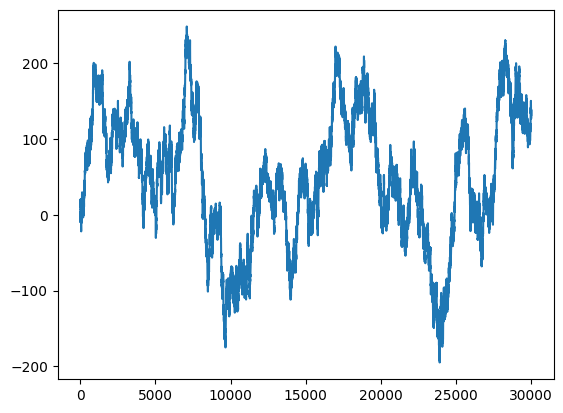

In [18]:
(res1).plot()

<Axes: >

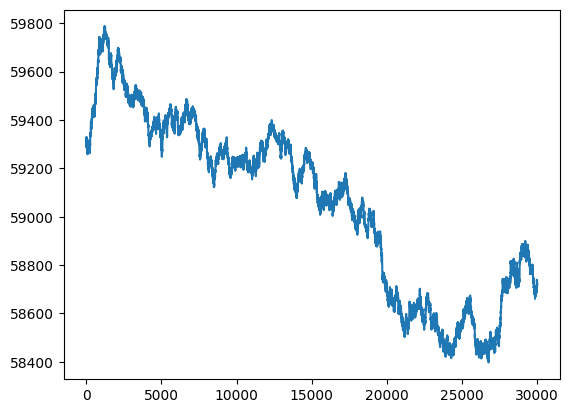

In [19]:
BASKET_1_data['weighted_mid_price'].plot()

<Axes: >

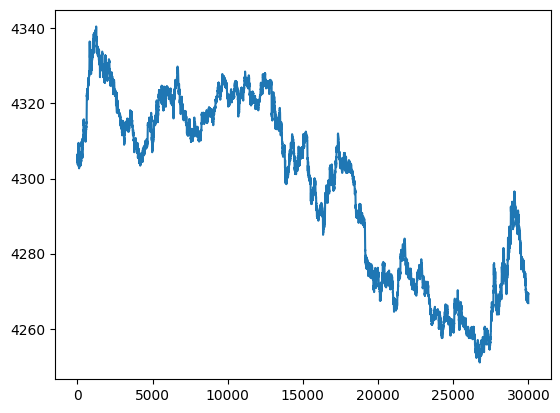

In [20]:
CROISSANTS_data['weighted_mid_price'].plot()

<Axes: >

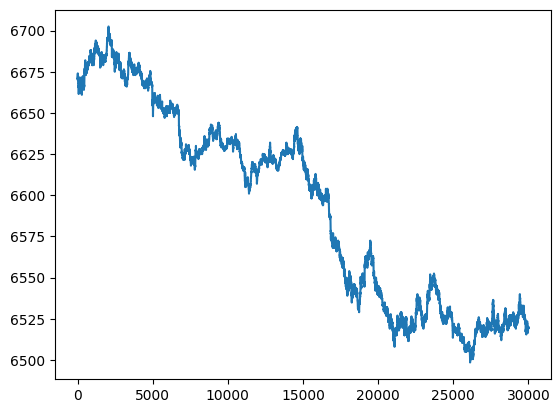

In [21]:
JAMS_data['weighted_mid_price'].plot()

<Axes: >

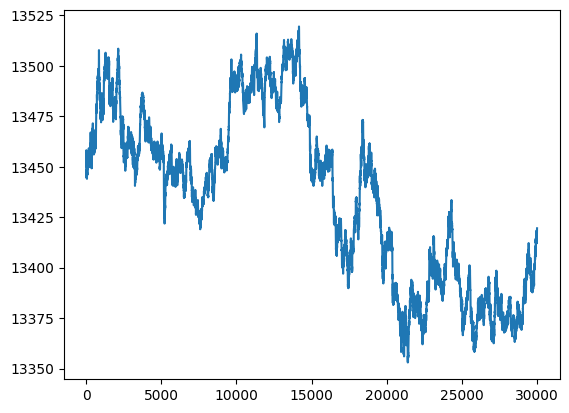

In [22]:
DJEMBE_data['weighted_mid_price'].plot()

<Axes: >

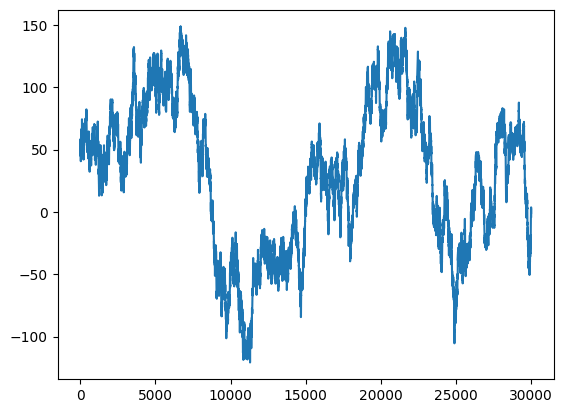

In [23]:
(res2).plot()

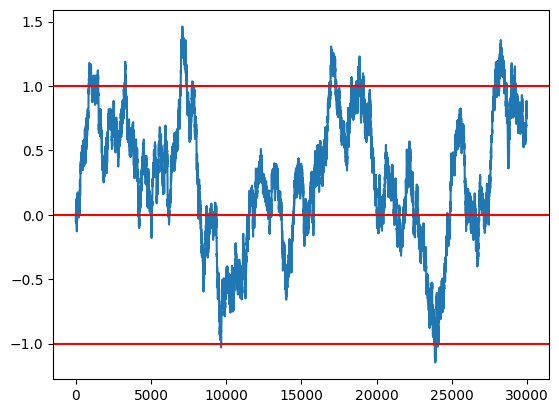

In [24]:
((res1)/170).plot()
# horz line
plt.axhline(y=1, color='r', linestyle='-')
plt.axhline(y=0, color='r', linestyle='-')
plt.axhline(y=-1, color='r', linestyle='-')

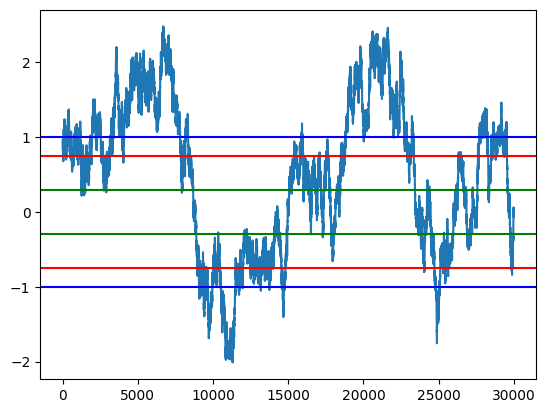

In [26]:
(res2/60).plot()
# horz line
plt.axhline(y=0.75, color='r', linestyle='-')
plt.axhline(y=0.3, color='g', linestyle='-')
plt.axhline(y=-0.3, color='g', linestyle='-')
plt.axhline(y=-0.75, color='r', linestyle='-')
plt.axhline(y=-1, color='b', linestyle='-')
plt.axhline(y=1, color='b', linestyle='-')

In [27]:
(res2 > 39).sum()

np.int64(14910)

<Axes: >

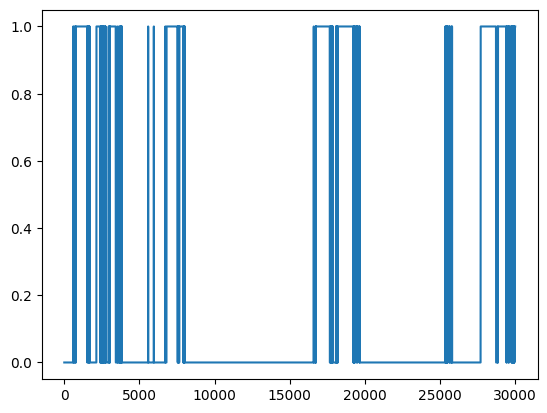

In [28]:
(res1 > 112).astype(int).plot()

# Fitting Regression

In [182]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# X combine croissant, djembe, jams
CROISSANTS_input = CROISSANTS_data[["weighted_mid_price"]]
DJEMBE_input = DJEMBE_data[['depth_imbalance_bid', 'depth_imbalance_ask',  "weighted_mid_price"]]
JAMS_input = JAMS_data[["weighted_mid_price"]]
JAMS_input["weighted_mid_price_square"] = np.log(JAMS_input["weighted_mid_price"])
CROISSANTS_input["weighted_mid_price_square"] = np.log(CROISSANTS_input["weighted_mid_price"])
Basket1_weight_mid = BASKET_1_data[['depth_imbalance_bid', 'depth_imbalance_ask',  "weighted_mid_price"]]
Basket2_weight_mid = BASKET_2_data[['depth_imbalance_bid', 'depth_imbalance_ask',  "weighted_mid_price"]]
y1 = np.array(Basket1_weight_mid)
y2 = np.array(Basket2_weight_mid)
X = np.column_stack((CROISSANTS_input, JAMS_input, Basket1_weight_mid))

In [186]:
Basket2_weight_mid["weighted_mid_price"]

,weighted_mid_price
0,30609.000000
1,30612.729730
2,30614.696970
3,30620.302326
4,30622.312500
...,...
29995,30117.697674
29996,30115.297872
29997,30113.326316
29998,30112.337209


In [187]:
np.corrcoef(Basket2_weight_mid["weighted_mid_price"], CROISSANTS_input["weighted_mid_price"])

array([[1.        , 0.90751992],
       [0.90751992, 1.        ]])

In [188]:
np.corrcoef(Basket2_weight_mid["weighted_mid_price"], JAMS_input["weighted_mid_price"])

array([[1.        , 0.95321528],
       [0.95321528, 1.        ]])

In [189]:
np.corrcoef(CROISSANTS_input["weighted_mid_price"], JAMS_input["weighted_mid_price"])

array([[1.        , 0.88535506],
       [0.88535506, 1.        ]])

In [155]:
X

array([[4.30450000e+03, 8.36741627e+00, 6.67050000e+03, 8.80545010e+00,
        5.92892368e+04],
       [4.30450000e+03, 8.36741627e+00, 6.67050000e+03, 8.80545010e+00,
        5.92874730e+04],
       [4.30450000e+03, 8.36741627e+00, 6.67100000e+03, 8.80552505e+00,
        5.92935000e+04],
       ...,
       [4.26850000e+03, 8.35901776e+00, 6.51950000e+03, 8.78255296e+00,
        5.87144769e+04],
       [4.26817213e+03, 8.35894094e+00, 6.52000000e+03, 8.78262965e+00,
        5.87255000e+04],
       [4.26681513e+03, 8.35862296e+00, 6.52000000e+03, 8.78262965e+00,
        5.87185000e+04]])

In [158]:
# regression with intercept
lr1 = LinearRegression(fit_intercept=True)
lr2 = LinearRegression(fit_intercept=True)

lr1.fit(X, y1)
lr2.fit(X, y2)

LinearRegression()

In [159]:
lr2.coef_, lr2.intercept_

(array([-4.49388502e+02,  1.93944477e+06,  1.21705303e+02, -7.90188836e+05,
         1.36686875e-01]),
 np.float64(-8125074.353742025))

In [160]:
# residual
y_pred2 = lr2.predict(X)
residual = y2 - y_pred2

residual.mean()

np.float64(1.2739949549237887e-09)

In [161]:
residual.std()

np.float64(49.704809614710506)

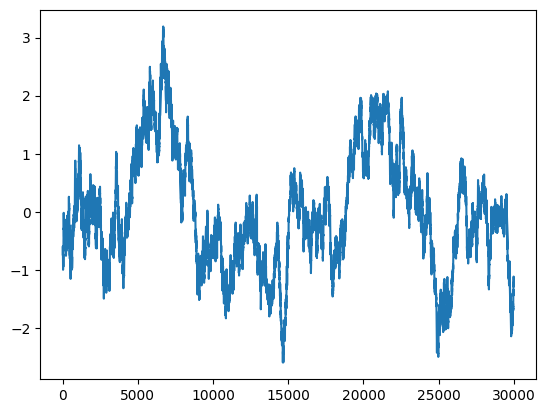

In [166]:
plt.plot(residual/49.704809614710506)

<Axes: >

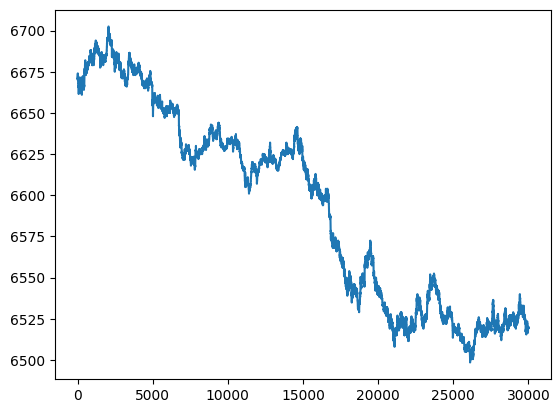

In [35]:
JAMS_input["weighted_mid_price"].plot()

<Axes: >

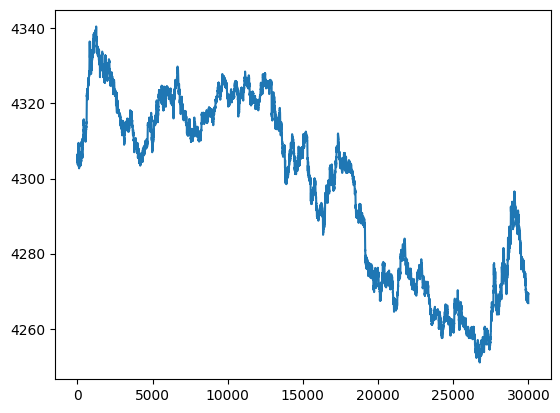

In [36]:
CROISSANTS_input["weighted_mid_price"].plot()

<Axes: >

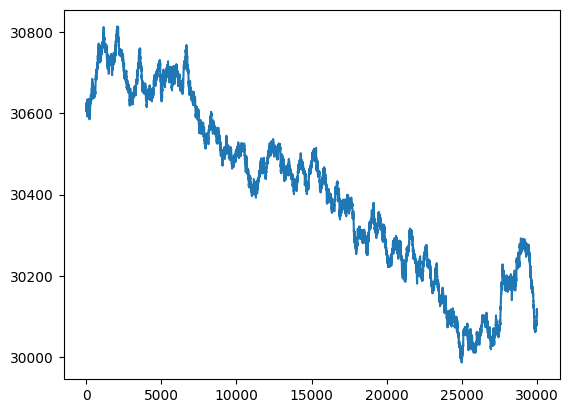

In [37]:
Basket2_weight_mid.plot()

In [ ]:
from datamodel import OrderDepth, UserId, TradingState, Order
from typing import List
import string

class Trader:

    def RAINFOREST_RESIN_fun(self, state):
      #  ------------- product data -------------
      OrderDepth = state.order_depths["RAINFOREST_RESIN"]
      position = state.position["RAINFOREST_RESIN"] if "RAINFOREST_RESIN" in state.position else 0
      best_bid, best_ask, mid_price, total_ask_vol, total_bid_vol, depth_imbalance_bid, depth_imbalance_ask, volume_imbalance, ratio_bid1, ratio_ask1, weighted_mid, bid_prices, bid_vol, ask_prices, ask_vol = self.calculate_indicators(OrderDepth)
      # -----------------------------------------

      orders = []
      max_buy_limit = 50 - position
      max_sell_limit = 50 + position
      level_ratio = [0.75, 0.25, 0.0]
      basic_limit = 5
      buy_amount, sell_amount, buy_amount2, sell_amount2 = [], [], [], []
      mid_price2 = (best_ask + best_bid) / 2.0
      if best_ask < 10000.5:
        orders.append(Order("RAINFOREST_RESIN", int(best_ask), max_buy_limit))
      if best_bid > 9999.5:
        orders.append(Order("RAINFOREST_RESIN", int(best_bid), -max_sell_limit))

      return orders


    def SQUID_INK_fun(self, state):
      #  ------------- product data -------------
      OrderDepth = state.order_depths["SQUID_INK"]
      position = state.position["SQUID_INK"] if "SQUID_INK" in state.position else 0
      best_bid, best_ask, mid_price, total_ask_vol, total_bid_vol, depth_imbalance_bid, depth_imbalance_ask, volume_imbalance, ratio_bid1, ratio_ask1, weighted_mid, bid_prices, bid_vol, ask_prices, ask_vol = self.calculate_indicators(OrderDepth)
      # -----------------------------------------
      orders = []
      max_buy_limit = 50 - position
      max_sell_limit = 50 + position

      orders.append(Order("SQUID_INK", int(mid_price) - 2, int(max_buy_limit/ 2)))
      orders.append(Order("SQUID_INK", int(mid_price) - 1, int(max_buy_limit / 2)))
      orders.append(Order("SQUID_INK", int(mid_price) + 1, -int(max_sell_limit / 2)))
      orders.append(Order("SQUID_INK", int(mid_price) + 2, -int(max_sell_limit / 2)))
      return orders



    def KELP_fun(self, state):
      #  ------------- product data -------------
      OrderDepth = state.order_depths["KELP"]
      position = state.position["KELP"] if "KELP" in state.position else 0
      best_bid, best_ask, mid_price, total_ask_vol, total_bid_vol, depth_imbalance_bid, depth_imbalance_ask, volume_imbalance, ratio_bid1, ratio_ask1, weighted_mid, bid_prices, bid_vol, ask_prices, ask_vol = self.calculate_indicators(OrderDepth)
      # -----------------------------------------
      orders = []
      max_buy_limit = 50 - position
      max_sell_limit = 50 + position

      orders.append(Order("KELP", int(mid_price) - 2, int(max_buy_limit / 2)))
      orders.append(Order("KELP", int(mid_price) - 1, int(max_buy_limit / 2)))
      orders.append(Order("KELP", int(mid_price) + 2, -int(max_sell_limit / 2)))
      orders.append(Order("KELP", int(mid_price) + 1, -int(max_sell_limit / 2)))
      return orders


      return orders

    def CROISSANTS_fun(self, state):
      #  ------------- product data -------------
      OrderDepth = state.order_depths["CROISSANTS"]
      position = state.position["CROISSANTS"] if "CROISSANTS" in state.position else 0
      best_bid, best_ask, mid_price, total_ask_vol, total_bid_vol, depth_imbalance_bid, depth_imbalance_ask, volume_imbalance, ratio_bid1, ratio_ask1, weighted_mid, bid_prices, bid_vol, ask_prices, ask_vol = self.calculate_indicators(OrderDepth)
      # -----------------------------------------
      orders = []
      max_buy_limit = 250 - position
      max_sell_limit = 250 + position

      orders.append(Order("CROISSANTS", int(mid_price) - 1, int(max_buy_limit / 2)))
      orders.append(Order("CROISSANTS", int(mid_price) - 2, int(max_buy_limit / 2)))
      orders.append(Order("CROISSANTS", int(mid_price) + 1, -int(max_sell_limit / 2)))
      orders.append(Order("CROISSANTS", int(mid_price) + 2, -int(max_sell_limit / 2)))
      return orders

    def JAMS_fun(self, state):
      #  ------------- product data -------------
      OrderDepth = state.order_depths["JAMS"]
      position = state.position["JAMS"] if "JAMS" in state.position else 0
      best_bid, best_ask, mid_price, total_ask_vol, total_bid_vol, depth_imbalance_bid, depth_imbalance_ask, volume_imbalance, ratio_bid1, ratio_ask1, weighted_mid, bid_prices, bid_vol, ask_prices, ask_vol = self.calculate_indicators(OrderDepth)
      # -----------------------------------------
      orders = []
      max_buy_limit = 350 - position
      max_sell_limit = 350 + position

      orders.append(Order("JAMS", int(mid_price) - 1, int(max_buy_limit / 2)))
      orders.append(Order("JAMS", int(mid_price) - 2, int(max_buy_limit / 2)))
      orders.append(Order("JAMS", int(mid_price) + 1, -int(max_sell_limit / 2)))
      orders.append(Order("JAMS", int(mid_price) + 2, -int(max_sell_limit / 2)))
      return orders

    def DJEMBES_fun(self, state):
      #  ------------- product data -------------
      OrderDepth = state.order_depths["DJEMBES"]
      position = state.position["DJEMBES"] if "DJEMBES" in state.position else 0
      best_bid, best_ask, mid_price, total_ask_vol, total_bid_vol, depth_imbalance_bid, depth_imbalance_ask, volume_imbalance, ratio_bid1, ratio_ask1, weighted_mid, bid_prices, bid_vol, ask_prices, ask_vol = self.calculate_indicators(OrderDepth)
      # -----------------------------------------
      orders = []
      max_buy_limit = 60 - position
      max_sell_limit = 60 + position

      orders.append(Order("DJEMBES", int(mid_price) - 1, int(max_buy_limit / 2)))
      orders.append(Order("DJEMBES", int(mid_price) - 2, int(max_buy_limit / 2)))
      orders.append(Order("DJEMBES", int(mid_price) + 1, -int(max_sell_limit / 2)))
      orders.append(Order("DJEMBES", int(mid_price) + 2, -int(max_sell_limit / 2)))
      return orders

    def Basket1_fun(self, state):
      #  ------------- product data -------------
      position = state.position["PICNIC_BASKET1"] if "PICNIC_BASKET1" in state.position else 0
      basket_data = self.calculate_indicators(state.order_depths["PICNIC_BASKET1"])
      croissant_data = self.calculate_indicators(state.order_depths["CROISSANTS"])
      djembe_data = self.calculate_indicators(state.order_depths["DJEMBES"])
      jams_data = self.calculate_indicators(state.order_depths["JAMS"])
      # -----------------------------------------
      residual = (basket_data[10] - 6 * croissant_data[10] - 3 * jams_data[10] - djembe_data[10] - 50.0) / 85.119451
      orders = []
      max_buy_limit = 60 - position
      max_sell_limit = 60 + position
      basic_limit = 5
      """
      if residual > 0.5:
        orders.append(Order("PICNIC_BASKET1", basket_data[0], -20))
      elif residual < -0.5:
        orders.append(Order("PICNIC_BASKET1", basket_data[1], 20))
      elif -0.15 < residual < 0.15:
        orders.append(Order("PICNIC_BASKET1", int(basket_data[2]), -position))
      """
      orders.append(Order("PICNIC_BASKET1", int(basket_data[2]) - 4, int(max_buy_limit / 3)))
      orders.append(Order("PICNIC_BASKET1", int(basket_data[2]) - 3, int(max_buy_limit / 3)))
      orders.append(Order("PICNIC_BASKET1", int(basket_data[2]) - 2, int(max_buy_limit / 3)))

      orders.append(Order("PICNIC_BASKET1", int(basket_data[2]) + 4, -int(max_sell_limit / 3)))
      orders.append(Order("PICNIC_BASKET1", int(basket_data[2]) + 3, -int(max_sell_limit / 3)))
      orders.append(Order("PICNIC_BASKET1", int(basket_data[2]) + 2, -int(max_sell_limit / 3)))
      return orders


    def Basket2_fun(self, state):
      #  ------------- product data -------------
      position = state.position["PICNIC_BASKET2"] if "PICNIC_BASKET2" in state.position else 0
      basket_data = self.calculate_indicators(state.order_depths["PICNIC_BASKET2"])
      croissant_data = self.calculate_indicators(state.order_depths["CROISSANTS"])
      jams_data = self.calculate_indicators(state.order_depths["JAMS"])
      # -----------------------------------------
      residual = (basket_data[10] - 4 * croissant_data[10] - 2 * jams_data[10] - 30.0) / 59.849200
      orders = []
      max_buy_limit = 100 - position
      max_sell_limit = 100 + position
      basic_limit = 10
      """
      if residual > 1:
        orders.append(Order("PICNIC_BASKET2", basket_data[0], -25))
      elif residual < -1:
        orders.append(Order("PICNIC_BASKET2", basket_data[1], 25))
      elif -0.3 < residual < 0.3:
        orders.append(Order("PICNIC_BASKET2", int(basket_data[2]), position))
      """
      orders.append(Order("PICNIC_BASKET2", int(basket_data[2]) - 4, int(max_buy_limit / 3)))
      orders.append(Order("PICNIC_BASKET2", int(basket_data[2]) - 3, int(max_buy_limit / 3)))
      orders.append(Order("PICNIC_BASKET2", int(basket_data[2]) - 2, int(max_buy_limit / 3)))

      orders.append(Order("PICNIC_BASKET2", int(basket_data[2]) + 4, -int(max_sell_limit / 3)))
      orders.append(Order("PICNIC_BASKET2", int(basket_data[2]) + 3, -int(max_sell_limit / 3)))
      orders.append(Order("PICNIC_BASKET2", int(basket_data[2]) + 2, -int(max_sell_limit / 3)))
      return orders



    def calculate_indicators(self, depth: OrderDepth):
      # buy
      bid_prices = [0] * 3
      bid_vol = [0] * 3
      ask_prices = [0] * 3
      ask_vol = [0] * 3
      if len(depth.buy_orders) != 0:
        buys = list(depth.buy_orders.items())
        for i in range(min(3,len(buys))):
          bid, bid_amt = buys[i]
          bid_prices[i] = bid * 1.0
          bid_vol[i] = bid_amt

      if len(depth.sell_orders) != 0:
        sells = list(depth.sell_orders.items())
        for i in range(min(3,len(sells))):
          ask, ask_amt = sells[i]
          ask_prices[i] = ask * 1.0
          ask_vol[i] = ask_amt

      mid_price = 1.0*(ask_prices[0] + bid_prices[0])/ 2
      best_bid = bid_prices[0] if len(bid_prices) == 0 else int((bid_prices[0] + bid_prices[1]) / 2.0)
      best_ask = ask_prices[0] if len(ask_prices) == 0 else int((ask_prices[0] + ask_prices[1]) / 2.0)
      total_ask_vol = sum(ask_vol)
      total_bid_vol = sum(bid_vol)
      depth_imbalance_bid = bid_vol[0] - bid_vol[1]
      depth_imbalance_ask = ask_vol[0] - ask_vol[1]
      volume_imbalance = total_bid_vol - total_ask_vol
      ratio_bid1 = bid_prices[0] / mid_price
      ratio_ask1 = ask_prices[0] / mid_price
      weighted_mid = mid_price
      if ask_vol[0] + bid_vol[0] != 0:
          weighted_mid = (ask_vol[0]*bid_prices[0] + bid_vol[0]*ask_prices[0]) / (ask_vol[0] + bid_vol[0])
      return best_bid, best_ask, mid_price, total_ask_vol, total_bid_vol, depth_imbalance_bid, depth_imbalance_ask, volume_imbalance, ratio_bid1, ratio_ask1, weighted_mid, bid_prices, bid_vol, ask_prices, ask_vol

    def run(self, state: TradingState):
        # Only method required. It takes all buy and sell orders for all symbols as an input, and outputs a list of orders to be sent
        print("traderData: " + state.traderData)
        print("Observations: " + str(state.observations))
        result = {}
        for product in state.order_depths:
            OrderDepth = state.order_depths[product]
            position = state.position[product] if product in state.position else 0
            best_bid, best_ask, mid_price, total_ask_vol, total_bid_vol, depth_imbalance_bid, depth_imbalance_ask, volume_imbalance, ratio_bid1, ratio_ask1, weighted_mid, bid_prices, bid_vol, ask_prices, ask_vol = self.calculate_indicators(OrderDepth)

            if product == "RAINFOREST_RESIN":
              orders = self.RAINFOREST_RESIN_fun(state)
              if len(orders) == 0:
                continue
              result[product] = orders
            elif product == "SQUID_INK":
              orders = [] #self.SQUID_INK_fun(state)
              if len(orders) == 0:
                continue
              result[product] = orders
            elif product == "KELP":
              orders = [] #self.KELP_fun(state)
              if len(orders) == 0:
                continue
              result[product] = orders

            elif product == "PICNIC_BASKET1":
              orders = self.Basket1_fun(state)
              if len(orders) == 0:
                continue
              result[product] = orders

            elif product == "PICNIC_BASKET2":
              orders = self.Basket2_fun(state)
              if len(orders) == 0:
                continue
              result[product] = orders
            elif product == "CROISSANTS":
              orders = [] #self.CROISSANTS_fun(state)
              if len(orders) == 0:
                continue
              result[product] = orders
            elif product == "JAMS":
              orders = [] #self.JAMS_fun(state)
              if len(orders) == 0:
                continue
              result[product] = orders
            elif product == "DJEMBES":
              orders = [] #self.DJEMBES_fun(state)
              if len(orders) == 0:
                continue
              result[product] = orders

        traderData = ""
        conversions = 0
        return result, conversions, traderData

In [ ]:
(1 ,2,3)[-1]

In [54]:
bas = pd.read_csv('bas.csv', delimiter=';').fillna(0)
bas

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,1,0,SQUID_INK,1835,1,1834.0,22.0,0.0,0.0,1837,1,1838.0,21.0,0.0,0.0,1836.0,0.0
1,1,0,PICNIC_BASKET1,58706,1,58705.0,10.0,58704.0,27.0,58715,1,58716.0,10.0,58717.0,27.0,58710.5,0.0
2,1,0,PICNIC_BASKET2,30252,11,30251.0,27.0,0.0,0.0,30257,1,30258.0,37.0,0.0,0.0,30254.5,0.0
3,1,0,RAINFOREST_RESIN,9998,3,9996.0,1.0,9995.0,21.0,10004,1,10005.0,21.0,0.0,0.0,10001.0,0.0
4,1,0,KELP,2032,23,0.0,0.0,0.0,0.0,2035,22,0.0,0.0,0.0,0.0,2033.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,1,99900,JAMS,6515,175,0.0,0.0,0.0,0.0,6517,175,0.0,0.0,0.0,0.0,6516.0,0.0
7996,1,99900,SQUID_INK,1816,28,0.0,0.0,0.0,0.0,1819,28,0.0,0.0,0.0,0.0,1817.5,0.0
7997,1,99900,RAINFOREST_RESIN,9995,28,0.0,0.0,0.0,0.0,10005,28,0.0,0.0,0.0,0.0,10000.0,132.0
7998,1,99900,DJEMBES,13366,78,0.0,0.0,0.0,0.0,13368,78,0.0,0.0,0.0,0.0,13367.0,0.0


In [55]:
bas["weighted_mid_price"] = bas.apply(compute_weighted_mid, axis=1)

In [197]:
bas

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,...,mid_price,profit_and_loss,weighted_mid_price,total_ask_vol,total_bid_vol,depth_imbalance_bid,depth_imbalance_ask,volume_imbalance,ratio_bid1,ratio_ask1
0,1,0,SQUID_INK,1835,1,1834.0,22.0,0.0,0.0,1837,...,1836.0,0.0,1835.955556,22.0,23.0,-21.0,-20.0,1.0,0.999455,1.000545
1,1,0,PICNIC_BASKET1,58706,1,58705.0,10.0,58704.0,27.0,58715,...,58710.5,0.0,58710.500000,38.0,38.0,-9.0,-9.0,0.0,0.999923,1.000077
2,1,0,PICNIC_BASKET2,30252,11,30251.0,27.0,0.0,0.0,30257,...,30254.5,0.0,30254.631579,38.0,38.0,-16.0,-36.0,0.0,0.999917,1.000083
3,1,0,RAINFOREST_RESIN,9998,3,9996.0,1.0,9995.0,21.0,10004,...,10001.0,0.0,9999.872340,22.0,25.0,2.0,-20.0,3.0,0.999700,1.000300
4,1,0,KELP,2032,23,0.0,0.0,0.0,0.0,2035,...,2033.5,0.0,2033.466667,22.0,23.0,23.0,22.0,1.0,0.999262,1.000738
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,1,99900,JAMS,6515,175,0.0,0.0,0.0,0.0,6517,...,6516.0,0.0,6516.000000,175.0,175.0,175.0,175.0,0.0,0.999847,1.000153
7996,1,99900,SQUID_INK,1816,28,0.0,0.0,0.0,0.0,1819,...,1817.5,0.0,1817.500000,28.0,28.0,28.0,28.0,0.0,0.999175,1.000825
7997,1,99900,RAINFOREST_RESIN,9995,28,0.0,0.0,0.0,0.0,10005,...,10000.0,132.0,10000.000000,28.0,28.0,28.0,28.0,0.0,0.999500,1.000500
7998,1,99900,DJEMBES,13366,78,0.0,0.0,0.0,0.0,13368,...,13367.0,0.0,13367.000000,78.0,78.0,78.0,78.0,0.0,0.999925,1.000075


In [56]:
bas["total_ask_vol"] = bas["ask_volume_1"] + bas["ask_volume_2"] + bas["ask_volume_3"]
bas["total_bid_vol"] = bas["bid_volume_1"] + bas["bid_volume_2"] + bas["bid_volume_3"]
bas["depth_imbalance_bid"] = bas["bid_volume_1"] - bas["bid_volume_2"]
bas["depth_imbalance_ask"] = bas["ask_volume_1"] - bas["ask_volume_2"]
bas["volume_imbalance"] = bas["total_bid_vol"] - bas["total_ask_vol"]
bas["ratio_bid1"] = bas["bid_price_1"] / bas["mid_price"]
bas["ratio_ask1"] = bas["ask_price_1"] / bas["mid_price"]

In [57]:
bas_croiss = bas[bas['product'] == 'CROISSANTS'].reset_index(drop=True)
bas_jams = bas[bas['product'] == 'JAMS'].reset_index(drop=True)
bas_djembe = bas[bas['product'] == 'DJEMBES'].reset_index(drop=True)
bas_basket1 = bas[bas['product'] == 'PICNIC_BASKET1'].reset_index(drop=True)
bas_basket2 = bas[bas['product'] == 'PICNIC_BASKET2'].reset_index(drop=True)

In [221]:
bas_res1 = (bas_basket1['mid_price'] - 8.42597362 * bas_croiss['mid_price'] - 3.10299083 * bas_jams['mid_price'] + 0.5110077 *  bas_djembe['mid_price'] - 9245.50647623845)/77.34952418392602 + 0.3 * np.sin(bas_djembe['timestamp']/100)

In [213]:
bas_res_o = (bas_basket1['mid_price'] - 8.42597362 * bas_croiss['mid_price'] - 3.10299083 * bas_jams['mid_price'] + 0.5110077 *  bas_djembe['mid_price'] - 9245.50647623845)/77.34952418392602

In [59]:
CROISSANTS_input2 = bas_croiss[['depth_imbalance_bid', 'depth_imbalance_ask',  "weighted_mid_price"]]
DJEMBE_input2 = bas_djembe[['depth_imbalance_bid', 'depth_imbalance_ask',  "weighted_mid_price"]]
JAM_input2 = bas_jams[['depth_imbalance_bid', 'depth_imbalance_ask',  "weighted_mid_price"]]

In [60]:
bas_res2 = bas_basket2['mid_price'] - 4 * bas_croiss['mid_price'] - 2 * bas_jams['mid_price']

In [107]:
X_2 = np.column_stack((CROISSANTS_input2["weighted_mid_price"], bas_basket2['weighted_mid_price']))
y_2 = np.array(bas_jams['weighted_mid_price'])
pred_y2 = lr2.predict(X_2)

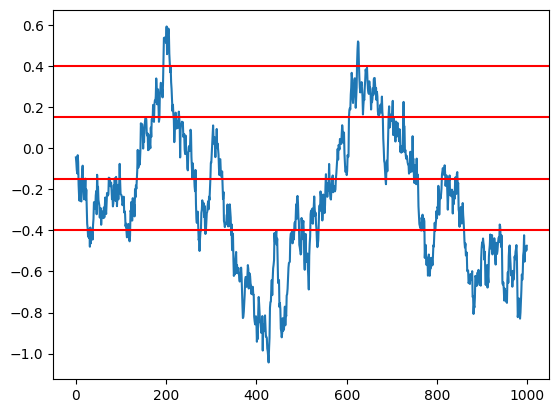

In [230]:

bas_res_o.plot()
plt.axhline(y=0.15, color='r', linestyle='-')
plt.axhline(y=-0.15, color='r', linestyle='-')
plt.axhline(y=0.4, color='r', linestyle='-')
plt.axhline(y=-0.4, color='r', linestyle='-')

(array([-5.53858172e-03, -9.02282696e-03,  8.42508305e+00, -2.91473470e-02,
        -1.89227572e-02, -5.11039920e-01,  1.25382756e-03,  1.17511246e-03,
         3.10311175e+00]),
 np.float64(9252.248792721184))

<Axes: >

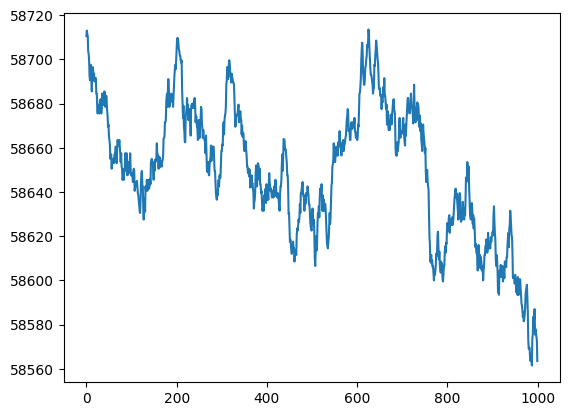

In [224]:
bas_basket1['mid_price'].plot()

<Axes: >

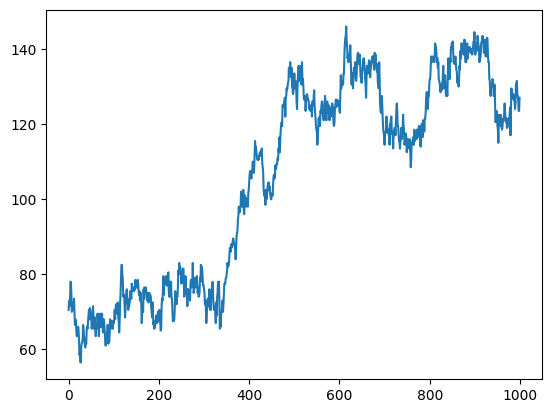

In [64]:
bas_res2.plot()

<Axes: >

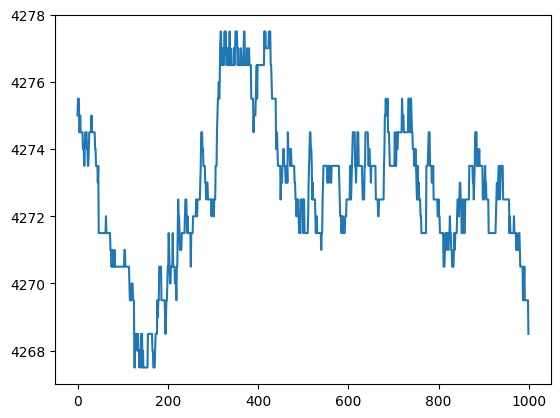

In [65]:
 bas_croiss['mid_price'].plot()

<Axes: >

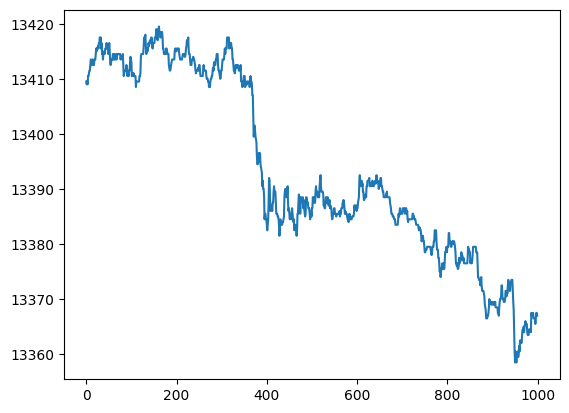

In [66]:
bas_djembe['mid_price'].plot()

<Axes: >

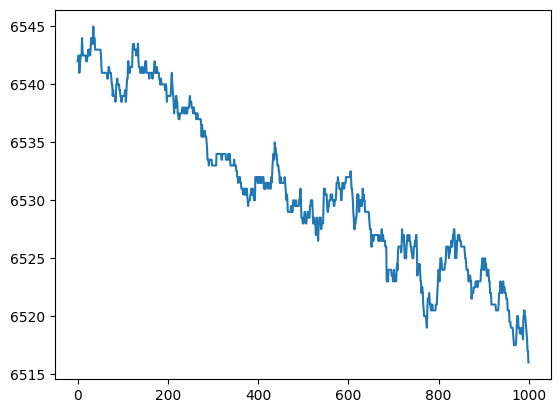

In [67]:
bas_jams['mid_price'].plot()

<Axes: >

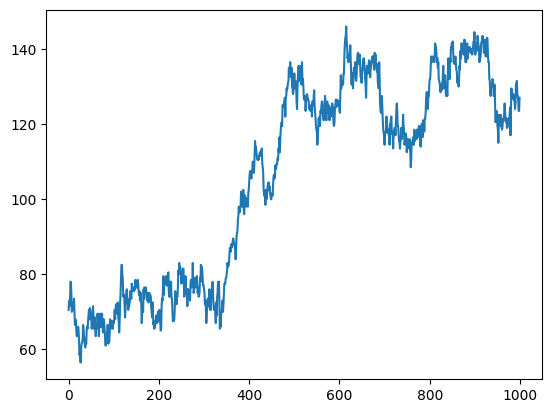

In [68]:
bas_res2.plot()

<Axes: >

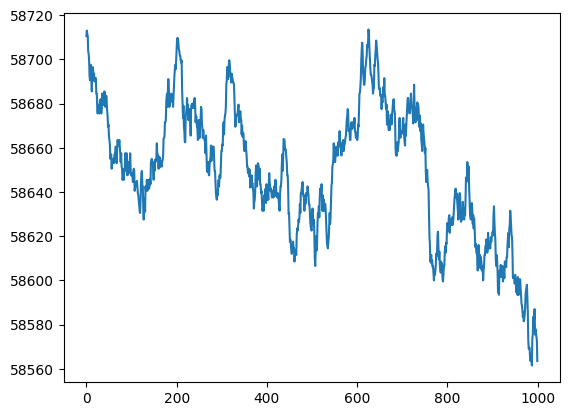

In [69]:
bas_basket1["mid_price"].plot()

<Axes: >

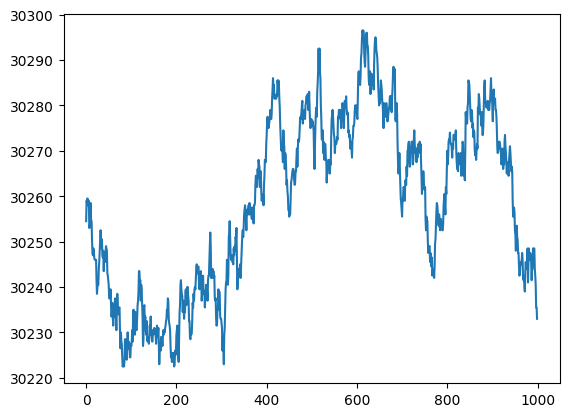

In [70]:
bas_basket2["mid_price"].plot()

In [71]:
prices['weighted_mid_price'] = prices.apply(compute_weighted_mid, axis=1)

In [72]:
v = bas_basket2['weighted_mid_price'] - 2.65967121 * bas_croiss['weighted_mid_price'] - 2.50101667 * bas_jams['weighted_mid_price'] - 2487.4009157439796

In [167]:
v2 =  bas_basket2['weighted_mid_price'] - (0.54215443 * bas_croiss['weighted_mid_price'] + 1.70794494 * bas_jams['weighted_mid_price'] + 0.26674777 * bas_basket1['weighted_mid_price']+1065.139134508048)

[['depth_imbalance_bid', 'depth_imbalance_ask',  "weighted_mid_price"]]

(array([0.54215443, 1.70794494, 0.26674777]), np.float64(1065.1391345080483))

$$
\text{jam} = a \cdot \text{basket} + b\cdot \text{croi} + c + ɛ
$$

In [168]:
v2

,weighted_mid_price
0,37.511508
1,40.473353
2,39.923434
3,42.069811
4,44.268360
...,...
995,104.046878
996,103.130147
997,100.081689
998,100.605759


<Axes: >

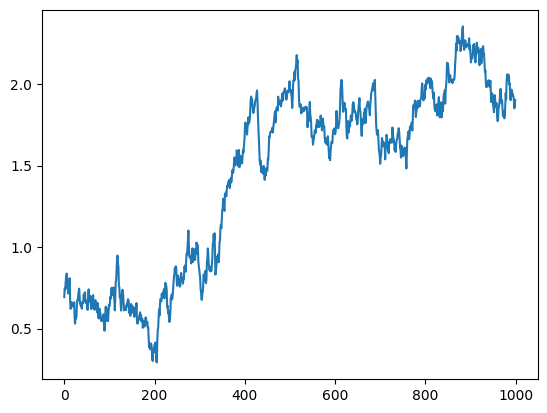

In [169]:
(v2/54.070375166613985).plot()

<Axes: >

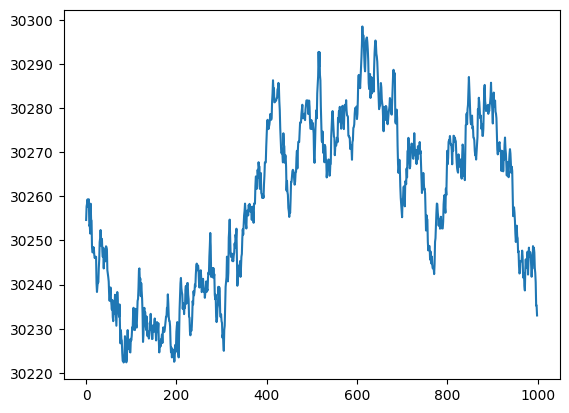

In [170]:
bas_basket2["weighted_mid_price"].plot()

<Axes: >

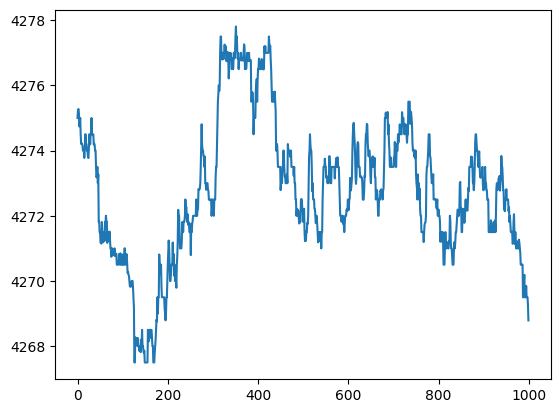

In [75]:
bas_croiss["weighted_mid_price"].plot()

<Axes: >

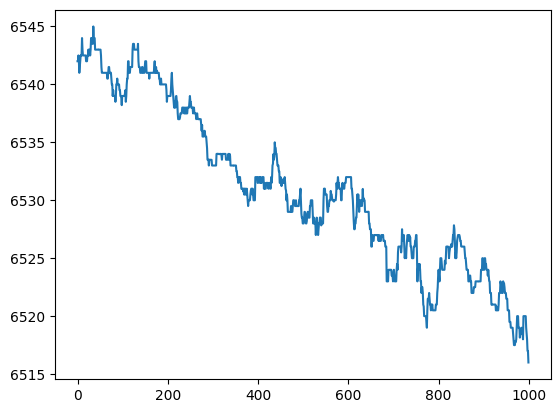

In [171]:
bas_jams["weighted_mid_price"].plot()

In [174]:
np.corrcoef(bas_jams["weighted_mid_price"], bas_croiss["weighted_mid_price"])

array([[ 1.        , -0.19885226],
       [-0.19885226,  1.        ]])

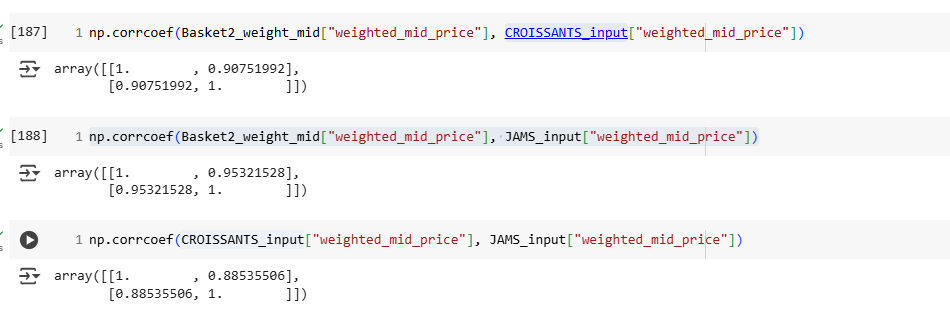

In [190]:
np.corrcoef(bas_basket2["weighted_mid_price"], bas_croiss["weighted_mid_price"])

array([[1.        , 0.48119673],
       [0.48119673, 1.        ]])

In [191]:
np.corrcoef(bas_basket2["weighted_mid_price"], bas_jams["weighted_mid_price"])

array([[ 1.       , -0.5599572],
       [-0.5599572,  1.       ]])